# KNN 


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from six import StringIO 
#import pydot 
from subprocess import call

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## KNN Classification in Action


(210,)


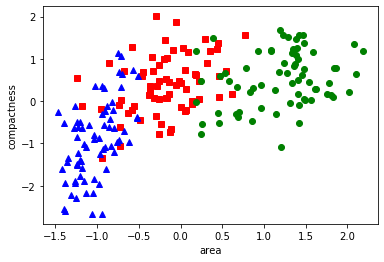

In [2]:
#Load Data
data = np.loadtxt('../datasets/seeds_dataset.txt')
x = data[:,[0,2]]
y = data[:,-1]

x=x-np.mean(x,axis=0);
x=x/np.std(x,axis=0);


#Plot data set 
labels=['sr','og','^b']
for i in [1,2,3]:
  plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
plt.xlabel('area');
plt.ylabel('compactness');
print(y.shape)

### Choose distance function and $k$

Select which cells below to run to choose from our three distance functions, and then select a value of $k$.

Use Euclidean Distance ($\ell_2$ norm): $||x-y||_2 = \sqrt{\sum_{d=1}^D (x_d-y_d)^2}$

In [3]:
metric='euclidean'

Use Manhattan Distance ($\ell_1$ norm): $||x-y||_1 = \sum_{d=1}^D |x_d-y_d|$

In [4]:
metric='manhattan'

Use Chebyshev Distance ($\ell_{\infty}$ norm): $||x-y||_{\infty} = \max_d |x_d-y_d|$

In [5]:
metric='chebyshev'

Select a number of Neighbors

In [8]:
K=31

### See the result

Run the code below to fit a classifier and visualize the result. The colored areas in the final plot show the predictions for different regions of the plane. Experiment with different choices of distance metric and values of $k$ to see how the predictions change.

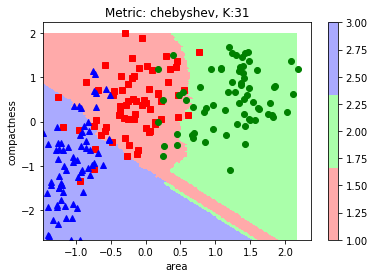

In [9]:
#Fit the specified classifier
clf = neighbors.KNeighborsClassifier(K, weights='uniform',metric=metric)
clf.fit(x, y)

#Prepare grid for plotting decision surface
gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
gx1l = gx1.flatten()
gx2l = gx2.flatten()
gx   = np.vstack((gx1l,gx2l)).T

#Compute a prediction for every point in the grid
gyhat = clf.predict(gx)
gyhat = gyhat.reshape(gx1.shape)

#Plot the results
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
for i in [1,2,3]:
  plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
plt.xlabel('area');
plt.ylabel('compactness');
plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
plt.colorbar();
plt.axis('tight');
plt.title("Metric: %s, K:%d"%(metric,K));